# data load

In [447]:
import pandas as pd

# data.csv 파일 읽어오기
df = pd.read_csv('../data/data.csv')

# 읽어온 데이터 확인
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [448]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 로드
df = pd.read_csv('../data/data.csv')

# 학습 데이터와 테스트 데이터로 분할
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 분할된 데이터 저장
train_df.to_csv('../data/train.csv', index=False)
test_df.to_csv('../data/test.csv', index=False)

print("데이터가 성공적으로 분할되어 저장되었습니다.")


데이터가 성공적으로 분할되어 저장되었습니다.


In [449]:
import os 
import numpy as np 
import random 
import torch 

def reset_seeds(seed=42):
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)    # 파이썬 환경변수 시드 고정
  np.random.seed(seed)
  torch.manual_seed(seed) # cpu 연산 무작위 고정
  torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정
  torch.backends.cudnn.deterministic = True  # cuda 라이브러리에서 Deterministic(결정론적)으로 예측하기 (예측에 대한 불확실성 제거 )

In [450]:
reset_seeds()

# EDA

In [451]:
# 읽어온 데이터 확인
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [453]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


## drop customerID

In [454]:
df = df.drop('customerID', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## 데이터 형태 파악

In [455]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [456]:
df[(df['InternetService'] != 'No') & (df['PhoneService'] != 'Yes')]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,Male,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.5,No
7007,Male,1,Yes,No,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No
7029,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7036,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No


- InternetService가 No 일 경우, OnlineSecurity	OnlineBackup	DeviceProtection	TechSupport	StreamingTV	StreamingMovies 항목들은 No internet service라는 값을 가지게 된다.
- 즉, 해당 컬럼들은 InternetService와 밀접한 관련이 있다.
- PhoneService와 InternetService가 모두 No일수는 없다.
- InternetService는 Yes가 아니라 서비스의 이름을 가지고 있다
  - one hot encoding적용
- PhoneService 없이 InternetService만 가입한 사람도 있다.

- tenure은 가입기간

In [457]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [458]:
columns = df.columns.drop('Churn')

In [459]:
numerical_columns = ['tenure', 'MonthlyCharges','TotalCharges']
categorical_colums = list(set(columns)-set(numerical_columns))

print(categorical_colums)

['DeviceProtection', 'OnlineSecurity', 'PaymentMethod', 'OnlineBackup', 'StreamingTV', 'Partner', 'Contract', 'InternetService', 'MultipleLines', 'SeniorCitizen', 'Dependents', 'PhoneService', 'TechSupport', 'StreamingMovies', 'PaperlessBilling', 'gender']


In [460]:
def is_binary_column(df, column_name):
#   해당 컬럼이 binary인지 확인하는 함수

#   Args:
#     dfandas DataFrame
#     column_name: 확인할 컬럼 이름

#   Returns:
#     bool: binary 컬럼이면 True, 아니면 False
  unique_values = df[column_name].unique()
  if len(unique_values) == 2:
    return True
  else:
    return False

binary_columns = []
non_binary_columns = []

for col in categorical_colums:
    is_binary_flag = is_binary_column(df,col)
    if (is_binary_flag==True):
       binary_columns.append(col)
    if (is_binary_flag==False):
       print(f"{col} : {df[col].unique()}")
       non_binary_columns.append(col)

print(f"binary_columns : {binary_columns}")
print(f"non_binary_columns : {non_binary_columns}")

DeviceProtection : ['No' 'Yes' 'No internet service']
OnlineSecurity : ['No' 'Yes' 'No internet service']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
OnlineBackup : ['Yes' 'No' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
InternetService : ['DSL' 'Fiber optic' 'No']
MultipleLines : ['No phone service' 'No' 'Yes']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
binary_columns : ['Partner', 'SeniorCitizen', 'Dependents', 'PhoneService', 'PaperlessBilling', 'gender']
non_binary_columns : ['DeviceProtection', 'OnlineSecurity', 'PaymentMethod', 'OnlineBackup', 'StreamingTV', 'Contract', 'InternetService', 'MultipleLines', 'TechSupport', 'StreamingMovies']


- Numerical Data : 
  - Continuous Data : MonthlyCharges, TotalCharges
  - Discrete Data : tenure
- Categorical Data : 
  - Binary Data : 'PhoneService', 'Dependents', 'gender_Male', 'SeniorCitizen', 'Churn', 'Partner', 'PaperlessBilling'
  - Non Binary Data : 'DeviceProtection', 'OnlineBackup', 'StreamingMovies', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'Contract', 'InternetService', 'MultipleLines', 'PaymentMethod'

- InternetService컬럼과 관련된 컬럼들 :
  - DeviceProtection, OnlineBackup, StreamingMovies, OnlineSecurity, TechSupport, StreamingTV 

- 전부 원핫인코딩을 돌려도 괜찮으리라 판단됨.

### tenure 그래프

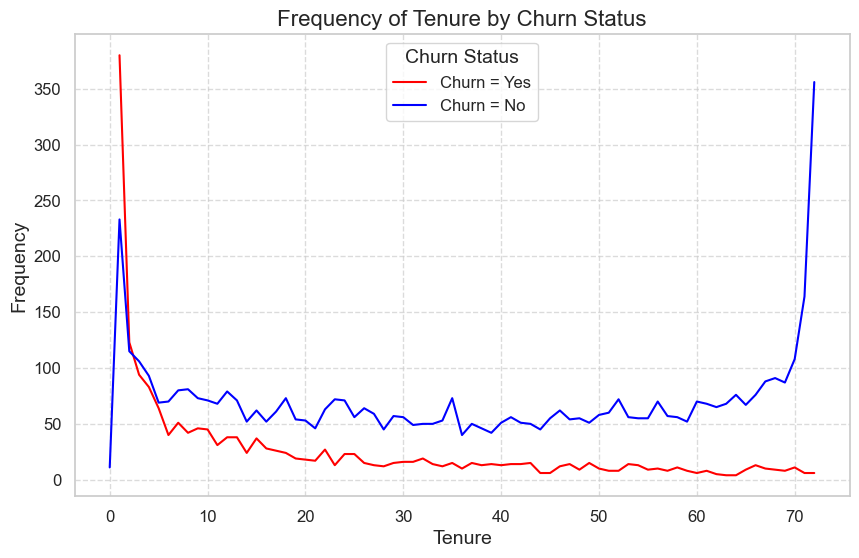

In [461]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# Churn이 Yes일 때 tenure의 빈도수 계산
tenure_counts_churn_yes = df[df['Churn'] == 'Yes']['tenure'].value_counts().sort_index()

# Churn이 No일 때 tenure의 빈도수 계산
tenure_counts_churn_no = df[df['Churn'] == 'No']['tenure'].value_counts().sort_index()

# 그래프 설정
plt.figure(figsize=(10, 6))

# Churn이 Yes일 때 tenure의 빈도수 시각화
sns.lineplot(x=tenure_counts_churn_yes.index, y=tenure_counts_churn_yes.values, marker='', color='red', label='Churn = Yes')

# Churn이 No일 때 tenure의 빈도수 시각화
sns.lineplot(x=tenure_counts_churn_no.index, y=tenure_counts_churn_no.values, marker='', color='blue', label='Churn = No')

# 제목과 축 레이블 설정
plt.title('Frequency of Tenure by Churn Status', fontsize=16)
plt.xlabel('Tenure', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# 그래프 꾸미기
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Churn Status', fontsize=12, title_fontsize=14)

# 그래프 출력
plt.show()


### MultipleLines 그래프

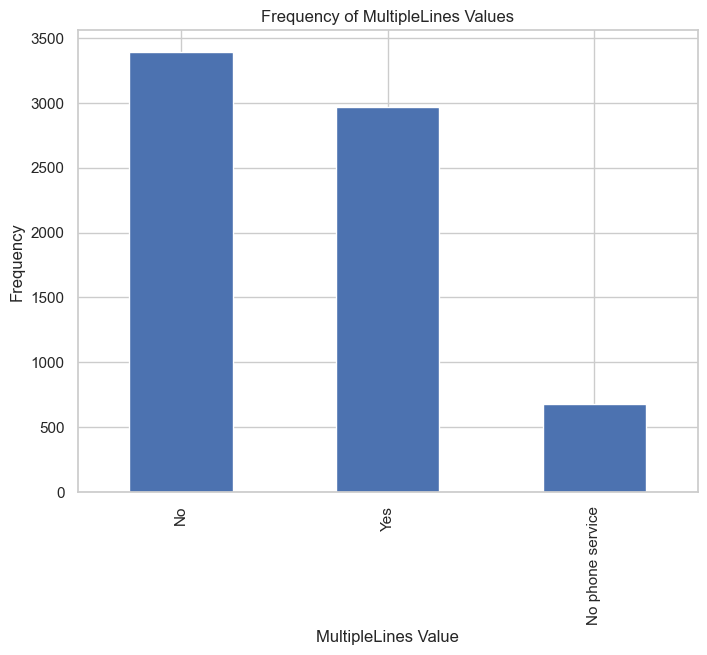

In [462]:
# MultipleLines 값의 빈도수 계산
frequency = df['MultipleLines'].value_counts()

# 그래프 그리기
plt.figure(figsize=(8, 6))
frequency.plot(kind='bar')
plt.xlabel('MultipleLines Value')
plt.ylabel('Frequency')
plt.title('Frequency of MultipleLines Values')
plt.show()


## 결측치 및 이상치 탐지

### 데이터 결측치 확인

In [463]:
# 공백 문자열을 NaN으로 변환 후 결측치 개수 세기
df = df.replace(' ', pd.NA)
missing_values = df.isnull().sum()
print(missing_values)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [464]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### 데이터 이상치 출력 : Z-Score

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [466]:
# TotalCharges의 NA 값을 0으로 대체
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# TotalCharges 컬럼을 float으로 변환
df['TotalCharges'] = df['TotalCharges'].astype(float)

Detected outliers:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


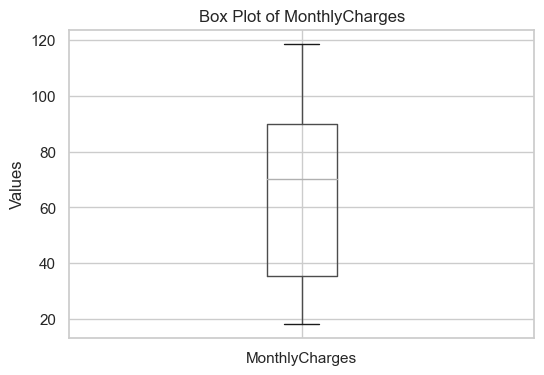

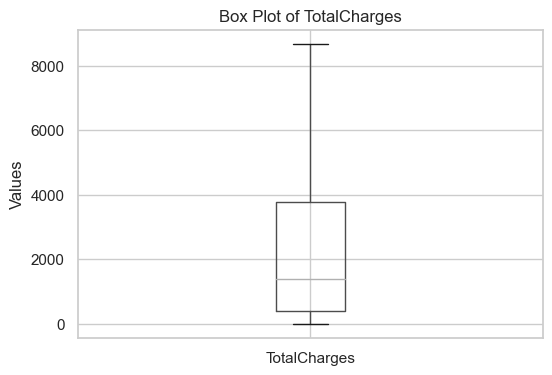

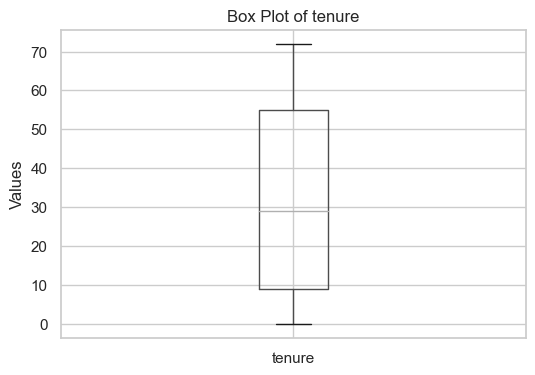

In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# z-score 계산 함수
def calculate_z_scores(df, columns):
    z_scores = pd.DataFrame()
    for column in columns:
        z_scores[column] = (df[column] - df[column].mean()) / df[column].std()
    return z_scores

# 이상치 탐지 함수
def detect_outliers(df, columns, threshold=3):
    z_scores = calculate_z_scores(df, columns)
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    return df[outliers]

# 이상치 탐지
columns_to_check = ['MonthlyCharges', 'TotalCharges', 'tenure']
outliers = detect_outliers(df, columns_to_check)

print("Detected outliers:")
print(outliers)

# 각 항목마다 박스플롯 생성
for column in columns_to_check:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Values')
    plt.show()


## MonthlyCharges 그래프

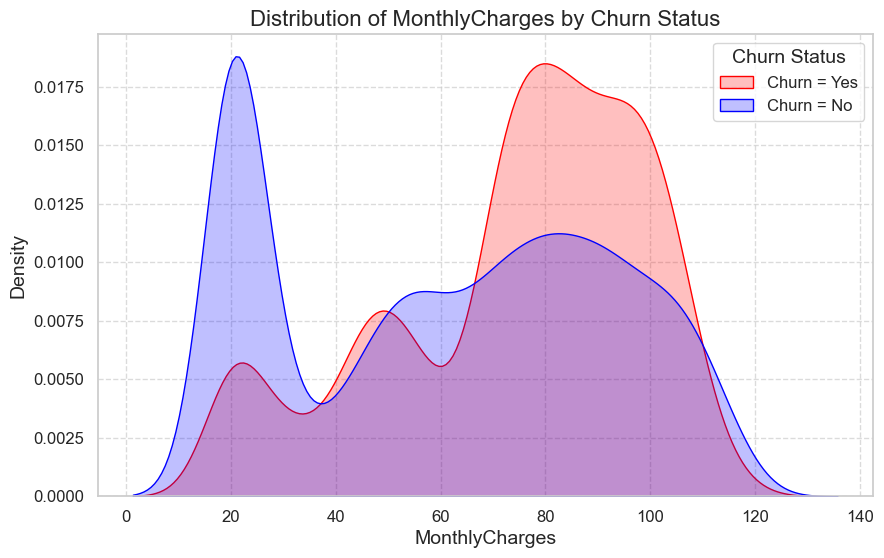

In [468]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 그래프 설정
plt.figure(figsize=(10, 6))

# Churn이 Yes일 때 MonthlyCharges의 KDE 시각화
sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='MonthlyCharges', color='red', label='Churn = Yes', fill=True)

# Churn이 No일 때 MonthlyCharges의 KDE 시각화
sns.kdeplot(data=df[df['Churn'] == 'No'], x='MonthlyCharges', color='blue', label='Churn = No', fill=True)

# 제목과 축 레이블 설정
plt.title('Distribution of MonthlyCharges by Churn Status', fontsize=16)
plt.xlabel('MonthlyCharges', fontsize=14)
plt.ylabel('Density', fontsize=14)

# 그래프 꾸미기
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Churn Status', fontsize=12, title_fontsize=14)

# 그래프 출력
plt.show()


## TotalCharges 그래프

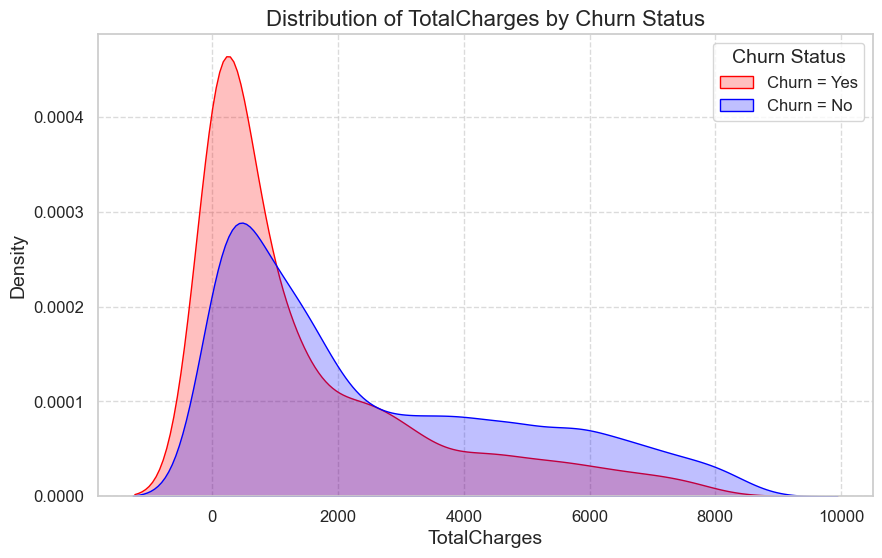

In [469]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 그래프 설정
plt.figure(figsize=(10, 6))

# Churn이 Yes일 때 TotalCharges의 KDE 시각화
sns.kdeplot(data=df[df['Churn'] == 'Yes'], x='TotalCharges', color='red', label='Churn = Yes', fill=True)

# Churn이 No일 때 TotalCharges의 KDE 시각화
sns.kdeplot(data=df[df['Churn'] == 'No'], x='TotalCharges', color='blue', label='Churn = No', fill=True)

# 제목과 축 레이블 설정
plt.title('Distribution of TotalCharges by Churn Status', fontsize=16)
plt.xlabel('TotalCharges', fontsize=14)
plt.ylabel('Density', fontsize=14)

# 그래프 꾸미기
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Churn Status', fontsize=12, title_fontsize=14)

# 그래프 출력
plt.show()


## 원핫인코딩 적용

In [470]:
# binary columns에 원핫 인코딩 적용
df = pd.get_dummies(df, columns=binary_columns)
# '_No'가 포함된 컬럼 삭제
drop_columns = ['_No', '_0', '_Female']
change_columns = ['_Yes', '_1', '_Male']


# non binary columns에 원핫 인코딩 적용
df = pd.get_dummies(df, columns=non_binary_columns)
drop_columns = ['No internet service','No phone service', 'Month-to-month', '_No', 'Credit card (automatic)']

for drop_col in drop_columns:
    df = df.drop(df.filter(regex=drop_col), axis=1)
    

DeviceProtection : ['No' 'Yes' '']
MultipleLines : [ 'No' 'Yes']
OnlineBackup : ['Yes' 'No' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
OnlineSecurity : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
Contract : [ 'One year' 'Two year']
InternetService : ['DSL' 'Fiber optic' ]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 ]

In [471]:
df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Partner_Yes',
       'SeniorCitizen_0', 'SeniorCitizen_1', 'Dependents_Yes',
       'PhoneService_Yes', 'PaperlessBilling_Yes', 'gender_Female',
       'gender_Male', 'DeviceProtection_Yes', 'OnlineSecurity_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineBackup_Yes', 'StreamingTV_Yes', 'Contract_One year',
       'Contract_Two year', 'InternetService_DSL',
       'InternetService_Fiber optic', 'MultipleLines_Yes', 'TechSupport_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7043 non-null   float64
 3   Churn                                    7043 non-null   object 
 4   Partner_Yes                              7043 non-null   bool   
 5   SeniorCitizen_0                          7043 non-null   bool   
 6   SeniorCitizen_1                          7043 non-null   bool   
 7   Dependents_Yes                           7043 non-null   bool   
 8   PhoneService_Yes                         7043 non-null   bool   
 9   PaperlessBilling_Yes                     7043 non-null   bool   
 10  gender_Female                            7043 no

In [473]:
df.columns = df.columns.str.replace(' ', '_')

In [474]:
df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Partner_Yes',
       'SeniorCitizen_0', 'SeniorCitizen_1', 'Dependents_Yes',
       'PhoneService_Yes', 'PaperlessBilling_Yes', 'gender_Female',
       'gender_Male', 'DeviceProtection_Yes', 'OnlineSecurity_Yes',
       'PaymentMethod_Bank_transfer_(automatic)',
       'PaymentMethod_Credit_card_(automatic)',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check',
       'OnlineBackup_Yes', 'StreamingTV_Yes', 'Contract_One_year',
       'Contract_Two_year', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'MultipleLines_Yes', 'TechSupport_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

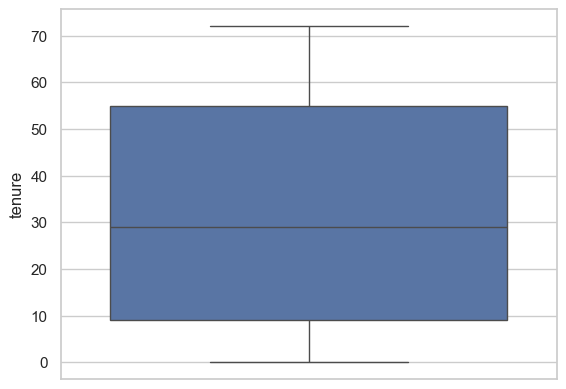

In [475]:
set_col = 'tenure'

sns.boxplot(df[set_col])
plt.show()


## 결측치 분석

In [476]:
# 공백 문자열을 NaN으로 변환 후 결측치 개수 세기
df = df.replace(' ', pd.NA)
missing_values = df.isnull().sum()
print(missing_values)

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Partner_Yes                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Dependents_Yes                             0
PhoneService_Yes                           0
PaperlessBilling_Yes                       0
gender_Female                              0
gender_Male                                0
DeviceProtection_Yes                       0
OnlineSecurity_Yes                         0
PaymentMethod_Bank_transfer_(automatic)    0
PaymentMethod_Credit_card_(automatic)      0
PaymentMethod_Electronic_check             0
PaymentMethod_Mailed_check                 0
OnlineBackup_Yes                           0
StreamingTV_Yes                            0
Contract_One_year                          0
Contract_Two_year                          0
InternetSe

In [477]:

# 결측치가 있는 행 출력
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [tenure, MonthlyCharges, TotalCharges, Churn, Partner_Yes, SeniorCitizen_0, SeniorCitizen_1, Dependents_Yes, PhoneService_Yes, PaperlessBilling_Yes, gender_Female, gender_Male, DeviceProtection_Yes, OnlineSecurity_Yes, PaymentMethod_Bank_transfer_(automatic), PaymentMethod_Credit_card_(automatic), PaymentMethod_Electronic_check, PaymentMethod_Mailed_check, OnlineBackup_Yes, StreamingTV_Yes, Contract_One_year, Contract_Two_year, InternetService_DSL, InternetService_Fiber_optic, MultipleLines_Yes, TechSupport_Yes, StreamingMovies_Yes]
Index: []

[0 rows x 27 columns]


- TotalCharges가 비어있는 고객들의 경우, 신규고객이다.
- 또한, 신규고객일 경우, 100퍼센트 확률로 이탈하지 않는다.

In [478]:
df['TotalCharges'].fillna(0, inplace=True)

# 데이터 스케일링

In [479]:
import pandas as pd
from sklearn.preprocessing import QuantileTransformer

# QuantileTransformer 객체 생성
scaler = QuantileTransformer(output_distribution='normal')

# 수치형 데이터 스케일링
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])


# 모델 적용

## 데이터 분리

In [480]:
from sklearn.model_selection import train_test_split

# 모델 적용
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1), 
                                                df['Churn'], 
                                                test_size=0.2, 
                                                random_state=42)

In [481]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 26), (1409, 26), (5634,), (1409,))

## 모델세팅

In [482]:
from sklearn.metrics import roc_auc_score

def get_auc(model, x_train=X_train, X_test=X_test):
    pred_probs = model.predict_proba(x_train)[:, 1]
    auc_train = roc_auc_score(y_train, pred_probs)

    pred_probs = model.predict_proba(X_test)[:, 1]
    auc_test = roc_auc_score(y_test, pred_probs)

    print(f"train AUC: {auc_train:.4f}, test AUC: {auc_test:.4f}")

    return auc_train, auc_test

### 컨퓨전 매트릭스 생성함수

In [483]:
from sklearn.metrics import confusion_matrix

# 컨퓨전 매트릭스 생성함수
def make_confusion_matrix(model, X_test, y_test):
    # 예측 값 생성
    y_pred = model.predict(X_test)

    # 컨퓨전 매트릭스 생성
    cm = confusion_matrix(y_test, y_pred)

    # 컨퓨전 매트릭스 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    return

# 모델 : 랜덤 포레스트

## random search

In [484]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from scipy.stats import randint
# from sklearn.ensemble import RandomForestClassifier

# # 하이퍼파라미터 탐색 범위 설정
# param_dist = {
#     'max_depth': randint(3, 10),  # 3에서 9 사이의 랜덤 정수
#     'max_features': ['auto', 'sqrt'],
#     'min_samples_leaf': randint(1, 5),
#     'min_samples_split': randint(2, 10),
#     'n_estimators': randint(50, 200)
# }

# # 랜덤 서치 수행
# random_search = RandomizedSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_distributions=param_dist,
#     n_iter=100,  # 탐색할 매개변수 조합의 개수
#     cv=5,  # 교차검증 폴드 수
#     scoring='roc_auc',  # 평가 지표
#     random_state=42
# )

# # 모델 학습 및 최적 하이퍼파라미터 찾기
# random_search.fit(X_train, y_train)

# # 최적 모델 및 평가
# best_model = random_search.best_estimator_
# best_params = random_search.best_params_
# print("Best parameters:", best_params)

# auc_all = get_auc(best_model, X_train, X_test)
# auc_train = auc_all[0]
# auc_test = auc_all[1]

- Best parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 192}
- train AUC: 0.8958, test AUC: 0.8663

In [485]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   5634 non-null   float64
 1   MonthlyCharges                           5634 non-null   float64
 2   TotalCharges                             5634 non-null   float64
 3   Partner_Yes                              5634 non-null   bool   
 4   SeniorCitizen_0                          5634 non-null   bool   
 5   SeniorCitizen_1                          5634 non-null   bool   
 6   Dependents_Yes                           5634 non-null   bool   
 7   PhoneService_Yes                         5634 non-null   bool   
 8   PaperlessBilling_Yes                     5634 non-null   bool   
 9   gender_Female                            5634 non-null   bool   
 10  gender_Male                              5634 non-n

In [487]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

params = {
  'random_state':42,
  'max_depth': 8,
  'max_features': 'sqrt',
  'min_samples_leaf': 4,
  'min_samples_split': 8,
  'n_estimators': 192
}
model_rf = RandomForestClassifier(**params,).fit(X_train, y_train)


auc_all = get_auc(model_rf,X_train,X_test)

auc_train = auc_all[0]
auc_test = auc_all[1]



train AUC: 0.8949, test AUC: 0.8659


In [488]:
from sklearn.ensemble import AdaBoostClassifier

params = {
    'algorithm':'SAMME.R',
    'estimator':None,
    'learning_rate':1.0,
    'n_estimators':50,
    'random_state':42
}

model_adb = AdaBoostClassifier(**params).fit(X_train,y_train)

auc_all = get_auc(model_adb,X_train,X_test)

auc_train = auc_all[0]
auc_test = auc_all[1]




c:\dev\project\AI_camp\3rd-Project\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


train AUC: 0.8551, test AUC: 0.8645


In [489]:
from sklearn.ensemble import VotingClassifier
# VotingClassifier 생성
model_vt = VotingClassifier(estimators=[('rf', model_rf), ('adb', model_adb)], voting='soft')

# 모델 학습
model_vt.fit(X_train, y_train)

# 예측
auc_all = get_auc(model_vt,X_train,X_test)

auc_train = auc_all[0]
auc_test = auc_all[1]

c:\dev\project\AI_camp\3rd-Project\.venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


train AUC: 0.8940, test AUC: 0.8662


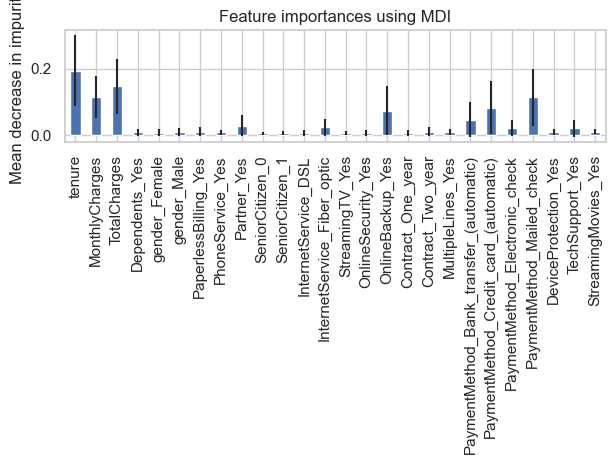

In [490]:
import matplotlib.pyplot as plt

# Feature importance 출력
importances = model_rf.feature_importances_
feature_names = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Dependents_Yes',
       'gender_Female', 'gender_Male', 'PaperlessBilling_Yes',
       'PhoneService_Yes', 'Partner_Yes', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'InternetService_DSL', 'InternetService_Fiber_optic', 'StreamingTV_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'Contract_One_year',
       'Contract_Two_year', 'MultipleLines_Yes',
       'PaymentMethod_Bank_transfer_(automatic)',
       'PaymentMethod_Credit_card_(automatic)',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingMovies_Yes']
forest_importances = pd.Series(importances, index=feature_names)

# 시각
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0), ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

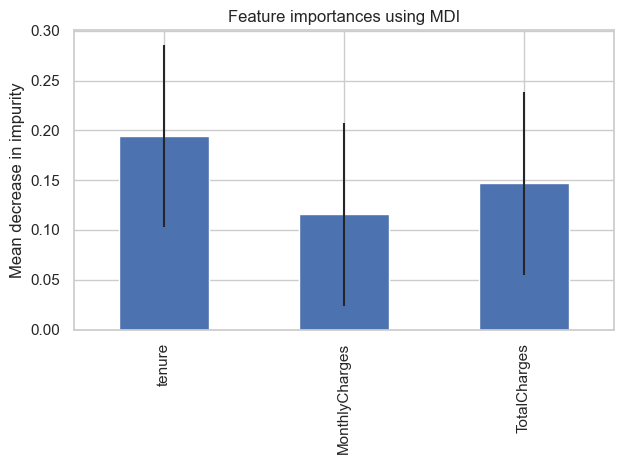

In [491]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 주요 Feature importance 출력
importances = model_rf.feature_importances_
feature_names = ['tenure', 'MonthlyCharges', 'TotalCharges']

# feature_names에 해당하는 중요도만 선택
selected_importances = [importances[df.columns.get_loc(name)] for name in feature_names]
forest_importances = pd.Series(selected_importances, index=feature_names)

# 시각화
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=np.std([tree.feature_importances_[df.columns.get_loc(name)] for tree in model_rf.estimators_ for name in feature_names], axis=0), ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()


## XAI - SHAP

In [492]:
import shap
import skimage

In [493]:
# explainer = shap.TreeExplainer(model_rf) # 학습된 모델을 넣는다.
# shap_values = explainer.shap_values(X_test)

In [494]:
# # X_train과 X_test의 컬럼 이름이 동일한지 확인
# assert list(X_train.columns) == list(X_test.columns), "X_train과 X_test의 컬럼 이름이 다릅니다."

# # X_train과 X_test의 형태 확인
# print(X_train.shape)  # 예: (1000, 26)
# print(X_test.shape)   # 예: (1409, 26)

# # 각 feature의 데이터 타입이 동일한지 확인
# assert all(X_train.dtypes == X_test.dtypes), "X_train과 X_test의 데이터 타입이 다릅니다."


In [495]:
# # SHAP 값의 형태 확인
# print(shap_values.shape)
# print(X_test.shape)

In [496]:
# # 전체 데이터 출력
# shap.initjs()
# shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)


In [497]:
# shap.summary_plot(shap_values[...,0],X_test)

In [498]:
# shap.summary_plot(shap_values[...,0],X_test, plot_type="bar")

## 컨퓨전 매트릭스

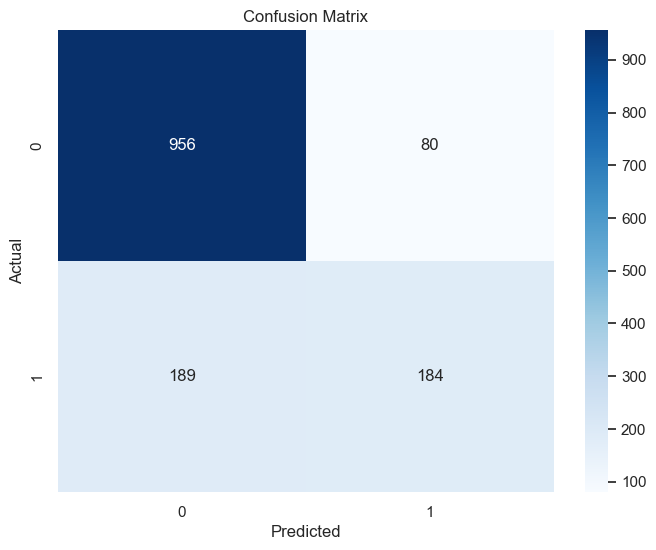

In [499]:
make_confusion_matrix(model_rf, X_test, y_test)

## force_plot

In [500]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 185 to 1161
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   1409 non-null   float64
 1   MonthlyCharges                           1409 non-null   float64
 2   TotalCharges                             1409 non-null   float64
 3   Partner_Yes                              1409 non-null   bool   
 4   SeniorCitizen_0                          1409 non-null   bool   
 5   SeniorCitizen_1                          1409 non-null   bool   
 6   Dependents_Yes                           1409 non-null   bool   
 7   PhoneService_Yes                         1409 non-null   bool   
 8   PaperlessBilling_Yes                     1409 non-null   bool   
 9   gender_Female                            1409 non-null   bool   
 10  gender_Male                              1409 non-n

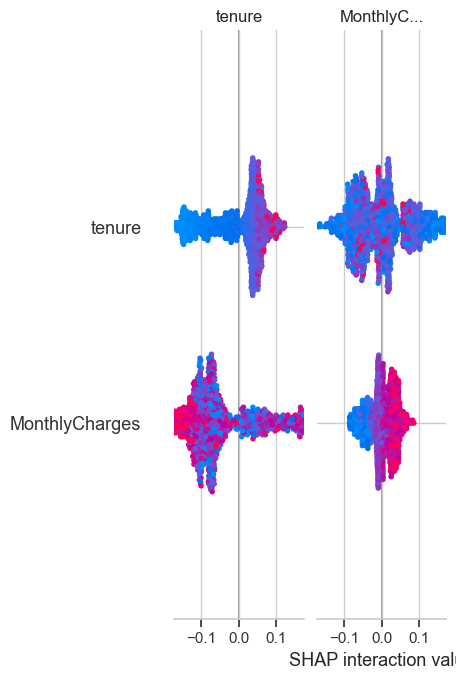

In [501]:
shap.summary_plot(shap_values,X_test, plot_type="bar")

- Totalcharges의 열이 objedt 타입이면 안됨

In [502]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']

0      -1.879580
1       0.207569
2      -1.170750
3       0.188003
4      -1.066959
          ...   
7038    0.236287
7039    1.855578
7040   -0.726954
7041   -0.780663
7042    1.607276
Name: TotalCharges, Length: 7043, dtype: float64

- 'Churn'열도 불타입으로 변환

In [503]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [504]:
if set(df['Churn'].unique()) == {'No', 'Yes'}:
    df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})

In [505]:
df['Churn']

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: Churn, Length: 7043, dtype: bool

# 모델 : 가우시안 NB

In [506]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Gaussian Naive Bayes 모델 초기화
model_gnb = GaussianNB(priors=None, var_smoothing=1e-09)

# 모델 학습
model_gnb.fit(X_train, y_train)

# 예측
y_pred = model_gnb.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.7537260468417317
Confusion Matrix:
[[764 272]
 [ 75 298]]
Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.74      0.81      1036
         Yes       0.52      0.80      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.77      1409



## 컨퓨전 매트릭스

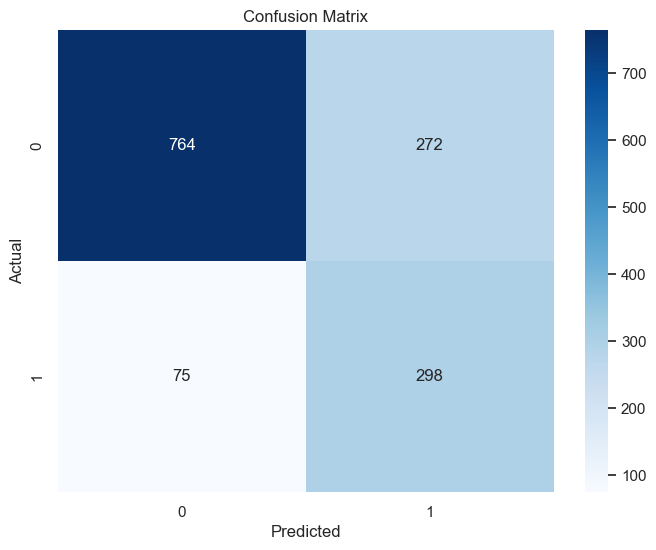

In [507]:
make_confusion_matrix(model_gnb, X_test, y_test)

# 모델 : SVM

In [508]:
from sklearn.svm import SVC

# 모델 초기화
model_svm = SVC(probability=True, random_state=42)  # SVM 모델 추가

# 모델 학습
model_svm.fit(X_train, y_train)

# 예측 (확률값)
y_pred_proba = model_vt.predict_proba(X_test)

# 확률값을 기반으로 예측값 설정
threshold = 0.4
y_pred_ori = (y_pred_proba[:, 1] >= threshold).astype(int)

# y_pred를 'No'와 'Yes'로 변환
y_pred = ['Yes' if label == 1 else 'No' for label in y_pred_ori]

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.7785663591199432
Confusion Matrix:
[[800 236]
 [ 76 297]]
Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.77      0.84      1036
         Yes       0.56      0.80      0.66       373

    accuracy                           0.78      1409
   macro avg       0.74      0.78      0.75      1409
weighted avg       0.82      0.78      0.79      1409



## 컨퓨전 매트릭스

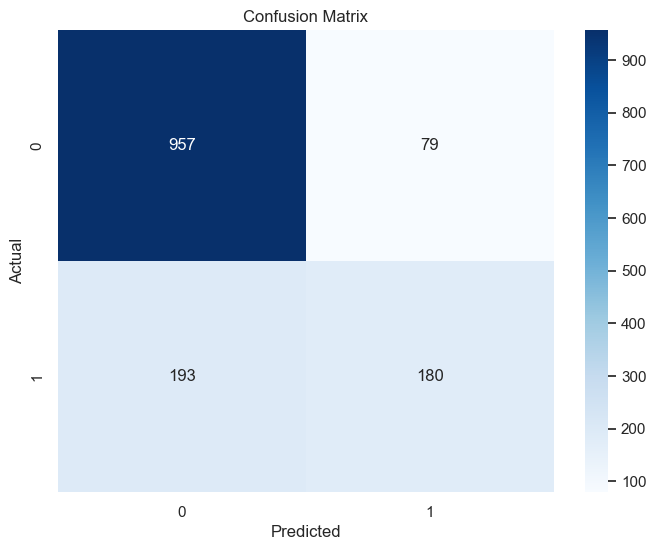

In [509]:
make_confusion_matrix(model_svm, X_test, y_test)

# 보팅

In [510]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 타겟 변수를 0과 1로 변환
y_test = y_test.map({'No': 0, 'Yes': 1})

# VotingClassifier 초기화
model_vt = VotingClassifier(estimators=[
    ('gnb', model_gnb),
    ('svm', model_svm)
], voting='soft')  # 'hard' 또는 'soft' 투표 방식 선택 가능

# 모델 학습
model_vt.fit(X_train, y_train)

# 예측 (확률값)
y_pred_proba = model_vt.predict_proba(X_test)

# 확률값을 기반으로 예측값 설정
threshold = 0.4
y_pred = (y_pred_proba[:, 1] >= threshold).astype(int)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


[[0.17417254 0.82582746]
 [0.67449088 0.32550912]
 [0.92535564 0.07464436]
 ...
 [0.92906143 0.07093857]
 [0.93555454 0.06444546]
 [0.69247446 0.30752554]]
Accuracy: 0.7757274662881476
Confusion Matrix:
[[805 231]
 [ 85 288]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1036
           1       0.55      0.77      0.65       373

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409



## 컨퓨전 매트릭스

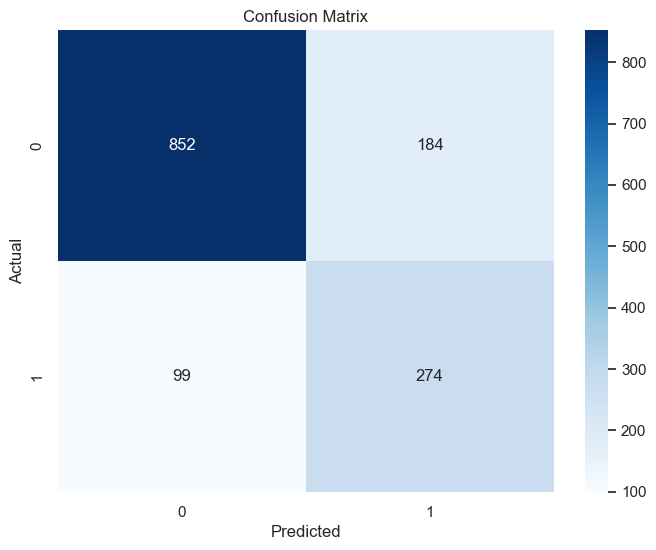

In [517]:

# 타겟 변수를 0과 1로 변환
y_test = y_test.map({0: 'No', 1: 'Yes'})

make_confusion_matrix(model_vt, X_test, y_test)

In [513]:
# from pycaret.classification import *

# train_data = df
# target_col = 'Churn'

# exp_clf = setup(data = train_data, target = target_col, session_id=42)

In [514]:
# best_model = compare_models(sort='Recall')

In [515]:
# print(best_model)